In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


In [2]:
fb_Train = pd.read_csv("Facebook_Ads_2.csv", sep=",", encoding="ISO-8859-1")
fb_Train.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


In [3]:
fb_Train.tail()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
494,Rigel,egestas.blandit.Nam@semvitaealiquam.com,Sao Tome and Principe,19.222746,44969.13495,0
495,Walter,ligula@Cumsociis.ca,Nepal,22.665662,41686.20425,0
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,35.320239,23989.80864,0
497,Pearl,penatibus.et@massanonante.com,Philippines,26.539170,31708.57054,0
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,32.386148,74331.35442,1


In [4]:
fb_Train.columns = ['Names', 'emails', 'Country', 'TimeSpentonSite', 'Salary',
       'Clicked']

In [5]:
Ad_ClickedDf = fb_Train[fb_Train["Clicked"] == 1]
Ad_NoClickedDf = fb_Train[fb_Train["Clicked"] == 0]
percent_Clicked = (len(Ad_ClickedDf)/len(fb_Train))*100
percent_NoClicked = (len(Ad_NoClickedDf)/len(fb_Train))*100

In [6]:
print("Total = ", len(fb_Train))
print("Number of customers who clicked on Ad = ", len(Ad_ClickedDf))
print("Percentage Clicked = ", percent_Clicked)
print("Did not Click = ", len(Ad_NoClickedDf))
print("Percentage who did not Click = ", percent_NoClicked)

Total =  499
Number of customers who clicked on Ad =  250
Percentage Clicked =  50.1002004008016
Did not Click =  249
Percentage who did not Click =  49.899799599198396


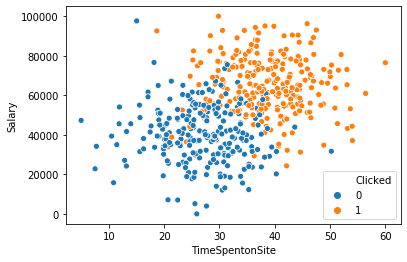

In [7]:
sns.scatterplot(data = fb_Train,x ="TimeSpentonSite" , y = "Salary", hue= "Clicked")

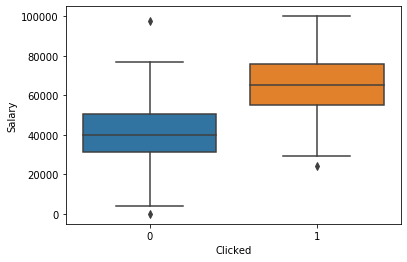

In [8]:
sns.boxplot(data = fb_Train, x = "Clicked", y = "Salary")

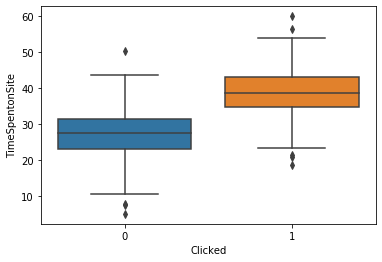

In [9]:
sns.boxplot(data = fb_Train, x = "Clicked", y = "TimeSpentonSite")

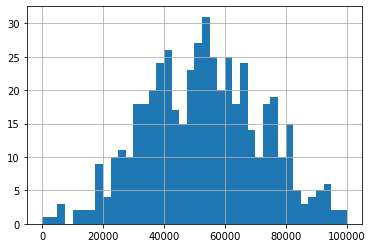

In [10]:
fb_Train.Salary.hist(bins = 40)

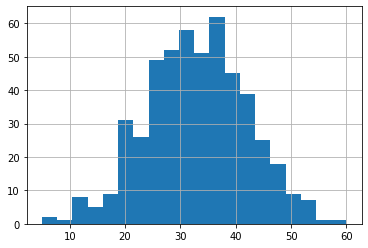

In [11]:
fb_Train.TimeSpentonSite.hist(bins = 20)

In [12]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1200)

fb_Train

,Names,emails,Country,TimeSpentonSite,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.060060,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.076740,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.608260,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.355360,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.112760,0
5,Carla Hester,mi@Aliquamerat.edu,Liberia,52.009946,80642.652220,1
6,Griffin Rivera,vehicula@at.co.uk,Syria,42.881370,61908.398150,1
7,Orli Casey,nunc.est.mollis@Suspendissetristiqueneque.co.uk,Czech Republic,25.676920,29851.411530,0
8,Marny Obrien,Phasellus@sedsemegestas.org,Armenia,40.698233,34281.118780,1
9,Rhonda Chavez,nec@nuncest.com,Somalia,29.687362,41098.878810,0


In [13]:
X = fb_Train.drop(["Names","emails","Country"], axis = 1)
X

,TimeSpentonSite,Salary,Clicked
0,25.649648,55330.060060,0
1,32.456107,79049.076740,1
2,20.945978,41098.608260,0
3,54.039325,37143.355360,1
4,34.249729,37355.112760,0
5,52.009946,80642.652220,1
6,42.881370,61908.398150,1
7,25.676920,29851.411530,0
8,40.698233,34281.118780,1
9,29.687362,41098.878810,0


In [14]:
Y= fb_Train.Clicked.values
X.drop("Clicked",axis = 1, inplace = True)


In [15]:
from sklearn import preprocessing
min_max_scale = preprocessing.MinMaxScaler()
scaleData = preprocessing.StandardScaler()



In [16]:
X_minmax = min_max_scale.fit_transform(X)
X_scaled = scaleData.fit_transform(X_minmax)


X_scaled

array([[-7.99457658e-01,  1.28257713e-01],
       [-5.10286870e-02,  1.37859159e+00],
       [-1.31666684e+00, -6.21944817e-01],
       [ 2.32223270e+00, -8.30443624e-01],
       [ 1.46195572e-01, -8.19280959e-01],
       [ 2.09908496e+00,  1.46259598e+00],
       [ 1.09531908e+00,  4.75030899e-01],
       [-7.96458904e-01, -1.21483411e+00],
       [ 8.55264296e-01, -9.81324726e-01],
       [-3.55476114e-01, -6.21930555e-01],
       [ 3.87487311e-02,  6.48400206e-02],
       [ 1.77112538e-01, -1.19530208e+00],
       [-8.36398567e-01, -4.81440402e-01],
       [ 1.49769499e+00, -2.23166322e-01],
       [ 5.27406027e-01,  6.21976462e-01],
       [-8.64648371e-01, -1.85222918e+00],
       [ 8.98997888e-01, -1.81000774e-01],
       [-8.97110238e-01, -7.59750031e-01],
       [ 1.75384005e+00, -9.55319376e-01],
       [-5.59287751e-01, -6.60247498e-02],
       [-1.73917217e+00,  4.62029789e-01],
       [-8.05159264e-01,  3.86803184e-02],
       [ 1.02580543e+00, -1.09023371e+00],
       [ 4.

In [17]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_scaled, Y, test_size=0.2, random_state = 10)

In [18]:
lr = LogisticRegression()


In [19]:
model = lr.fit(X_Train,Y_Train)
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
Y_predictTrain = model.predict(X_Train)
Y_predictTrain

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,

In [21]:
Y_Train

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,

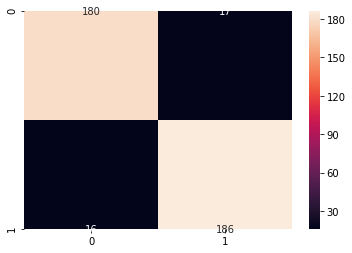

In [22]:
cn_mtrix = confusion_matrix(Y_Train, Y_predictTrain)
sns.heatmap(cn_mtrix, annot = True, fmt = "d")

In [23]:
Y_predict = model.predict(X_Test)
Y_predict

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [24]:
Y_Test

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

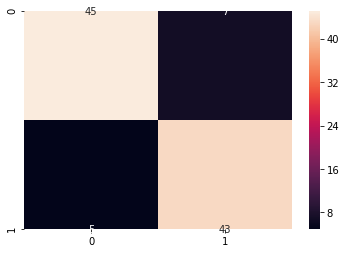

In [25]:
cn_mtrix = confusion_matrix(Y_Test, Y_predict)
sns.heatmap(cn_mtrix, annot = True, fmt = "d")

In [26]:
from sklearn.metrics import classification_report
print(classification_report(Y_Test, Y_predict))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88        52
           1       0.86      0.90      0.88        48

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100

